## A.1 Import libraries

In [2]:
library(stringr)
library(leaflet)
library(dplyr)

# 1. Built in maps

## 1.1 List providers object

In [3]:
names(providers)[c(1:5)] #Shows first 5 in provider list

[1] "OpenStreetMap"        "OpenStreetMap.Mapnik" "OpenStreetMap.DE"    
[4] "OpenStreetMap.CH"     "OpenStreetMap.France"

## 1.2 Search providers object

In [4]:
filter = str_detect(names(providers), "Esri") #Creates filter
names(providers)[filter] #Filters Esri maps

[1] "Esri"                   "Esri.WorldStreetMap"    "Esri.DeLorme"          
 [4] "Esri.WorldTopoMap"      "Esri.WorldImagery"      "Esri.WorldTerrain"     
 [7] "Esri.WorldShadedRelief" "Esri.WorldPhysical"     "Esri.OceanBasemap"     
[10] "Esri.NatGeoWorldMap"    "Esri.WorldGrayCanvas"

## 1.3. Show ESRI map

In [5]:
leaflet() %>%
  addProviderTiles("Esri")

HTML widgets cannot be represented in plain text (need html)

# 2. Mapping

## 2.1 Map 1 point with popup

In [6]:
#Enter longitude and latitude
long = -76.948270
lat = 38.983640
# Creat map
leaflet() %>% 
  addProviderTiles("CartoDB") %>% 
  addMarkers(lng = long, lat = lat, popup = 'SPP')

HTML widgets cannot be represented in plain text (need html)

## 2.2 Map from dataframe

### 2.2.1 Import dataframe

In [7]:
url = "https://assets.datacamp.com/production/repositories/1942/datasets/18a000cf70d2fe999c6a6f2b28a7dc9813730e74/ipeds.csv"
ipeds = read.csv(url)
ipeds %>% head(3)

name                                    lat      lng       sector_label
1 A T Still University of Health Sciences 40.19365 -92.58918 Private     
2 Abilene Christian University            32.46915 -99.70954 Private     
3 Abraham Baldwin Agricultural College    31.48189 -83.52828 Public

### 2.2.2 Map example 1

In [8]:
map = leaflet() %>% 
addProviderTiles("CartoDB") %>% 
addCircleMarkers(data=ipeds,
                   radius = 2, color = "red", popup=~name)
map

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

###  2.2.3 Map example 2

In [9]:
map2 <- map %>% 
  clearMarkers() %>% 
  clearBounds()
map2 %>% 
  addCircleMarkers(data = ipeds, radius = 2, 
                   popup = ~paste0(name, "<br/>","<br/>", sector_label))


Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

### 2.2.4 Map example 3

In [10]:
# Make a color palette called pal for the values of `sector_label` using `colorFactor()`  
# Colors should be: "red", "blue", and "#9b4a11" for "Public", "Private", and "For-Profit" colleges, respectively
pal <- colorFactor(palette = c("red", "blue", "#9b4a11"), 
                   levels = c("Public", "Private", "For-Profit"))

# Add circle markers that color colleges using pal() and the values of sector_label
map2 <- 
    map %>% 
        addCircleMarkers(data = ipeds, radius = 2, 
                         color = ~pal(sector_label), 
                         label = ~paste0(name, " (", sector_label, ")"))%>% 
    addLegend(pal = pal, 
              values = c("Public", "Private", "For-Profit"))

# Print map2
map2

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

# 3. Leaflets extras

In [11]:
library(leaflet.extras)
library(htmltools)

## 3.1 Create three dfs for type of schools

In [15]:
# Create data frame called public with only public colleges
public <- ipeds %>% filter(sector_label == "Public")  
profit <- ipeds %>%filter(sector_label == "For-Profit")  
private <- ipeds %>% filter(sector_label == "Private")  

## 3.2 Adding multiple map layers

In [16]:
m4 <- leaflet() %>% 

#Adding three sep maps part 1
        addTiles(group = "OSM") %>% 
        addProviderTiles("CartoDB", group = "Carto") %>% 
        addProviderTiles("Esri", group = "Esri")

## 3.3 Adding schools

In [17]:
m4  = m4 %>% addCircleMarkers(data = public, radius = 2, label = ~htmlEscape(name),
                         color = ~pal(sector_label), group = "Public") %>% #Public

        addCircleMarkers(data = private, radius = 2, label = ~htmlEscape(name),
                           color = ~pal(sector_label), group = "Private")  %>% #Private

        addCircleMarkers(data = profit, radius = 2, label = ~htmlEscape(name),
                         color = ~pal(sector_label), group = "For-Profit") #For profit

Assuming "lng" and "lat" are longitude and latitude, respectively
Assuming "lng" and "lat" are longitude and latitude, respectively
Assuming "lng" and "lat" are longitude and latitude, respectively


## 3.4 Add layer control: ability to toggle maps and groups in map

In [18]:
m4 = m4 %>% addLayersControl(baseGroups = c("OSM", "Carto", "Esri"), 
                         overlayGroups = c("Public", "Private", "For-Profit")) %>% 
        setView(lat = 39.8282, lng = -98.5795, zoom = 4) 
m4

HTML widgets cannot be represented in plain text (need html)

## 3.5 Search feature

In [19]:
# Make each sector of colleges searchable 
m4_search <- m4  %>% 
        addSearchFeatures(
            targetGroups = c("Public", "Private", "For-Profit"), 
            # Set the search zoom level to 18
            options = searchFeaturesOptions(zoom = 18)) 

# Try searching the map for a college
m4_search

HTML widgets cannot be represented in plain text (need html)

## 3.6 Cluster option

In [20]:
ipeds %>% 
    leaflet() %>% 
        addTiles() %>% 
        # Sanitize any html in our labels
        addCircleMarkers(radius = 2, label = ~htmlEscape(name),
                         # Color code colleges by sector using the `pal` color palette
                         color = ~pal(sector_label),
                         # Cluster all colleges using `clusterOptions`
                         clusterOptions = markerClusterOptions()) 

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

# 4. Google maps

In [24]:
suppressMessages(library(ggmap))
library(maps)
library(mapproj)

In [25]:
#THIS WILL NOT WORK UNLESS YOU INPUT AN API KEY!!!!!
api_key = 'YOURAPIKEY'
register_google(api_key)

## 4.1 Plot by long and lat

Source : https://maps.googleapis.com/maps/api/staticmap?center=38.98364,-76.94827&zoom=15&size=640x640&scale=1&maptype=terrain&language=en-EN&key=xxx-yctv0


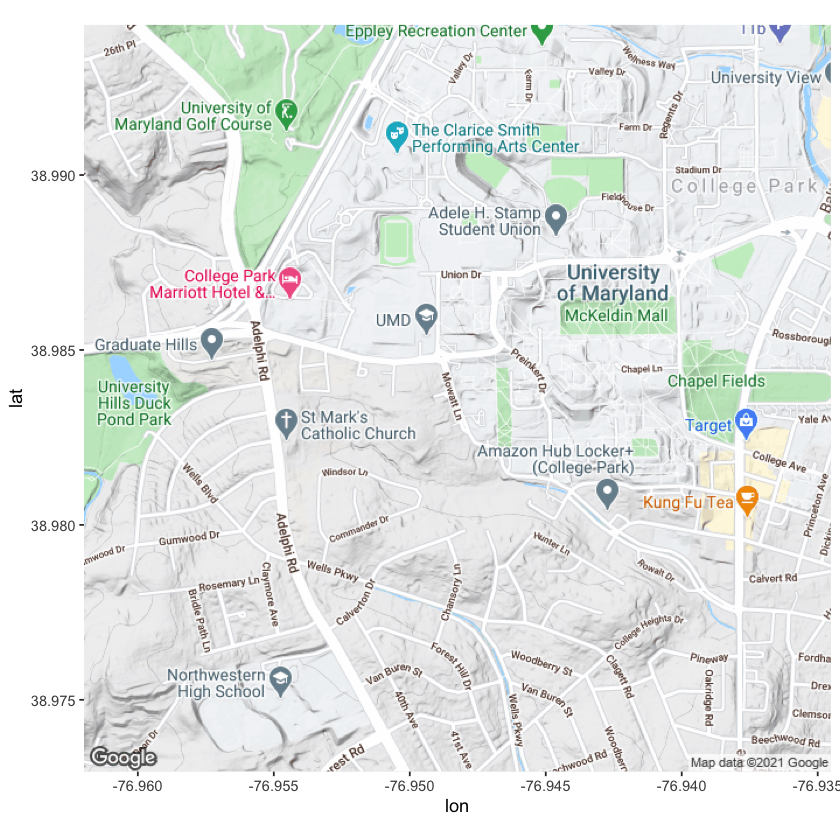

In [26]:
#Coordinates
spp = c(long = -76.948270, lat = 38.983640)
# Get map
map = get_map(spp, zoom = 15, scale = 1)
# Plot map
ggmap(map)

## 4.2 Download all countries long and lat

In [27]:
dfworldmap = map_data("world")
dfworldmap %>%  head(2)

long      lat    group order region subregion
1 -69.89912 12.452 1     1     Aruba  NA       
2 -69.89571 12.423 1     2     Aruba  NA

### 4.2.1 Search for country

In [28]:
dfworldmap %>% filter(region=='Indonesia') %>% head(2)

long     lat       group order region    subregion
1 122.9489 -10.90928 692   46747 Indonesia Roti     
2 122.8559 -10.90967 692   46748 Indonesia Roti

### 4.2.2 Search for US states

In [29]:
us = map_data("state")
us %>% head(3)

long      lat      group order region  subregion
1 -87.46201 30.38968 1     1     alabama NA       
2 -87.48493 30.37249 1     2     alabama NA       
3 -87.52503 30.37249 1     3     alabama NA

## 4.3 Map from dataframe

In [30]:
data("USArrests")
arrest = USArrests %>% #create new df
  add_rownames("region") %>% # add a new var region
  #format data to work
  mutate(region=tolower(region)) #make it all lowercase

head(arrest) #check that we have our new var!

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

region     Murder Assault UrbanPop Rape
1 alabama    13.2   236     58       21.2
2 alaska     10.0   263     48       44.5
3 arizona     8.1   294     80       31.0
4 arkansas    8.8   190     50       19.5
5 california  9.0   276     91       40.6
6 colorado    7.9   204     78       38.7

Warning message:
“Ignoring unknown aesthetics: x, y”

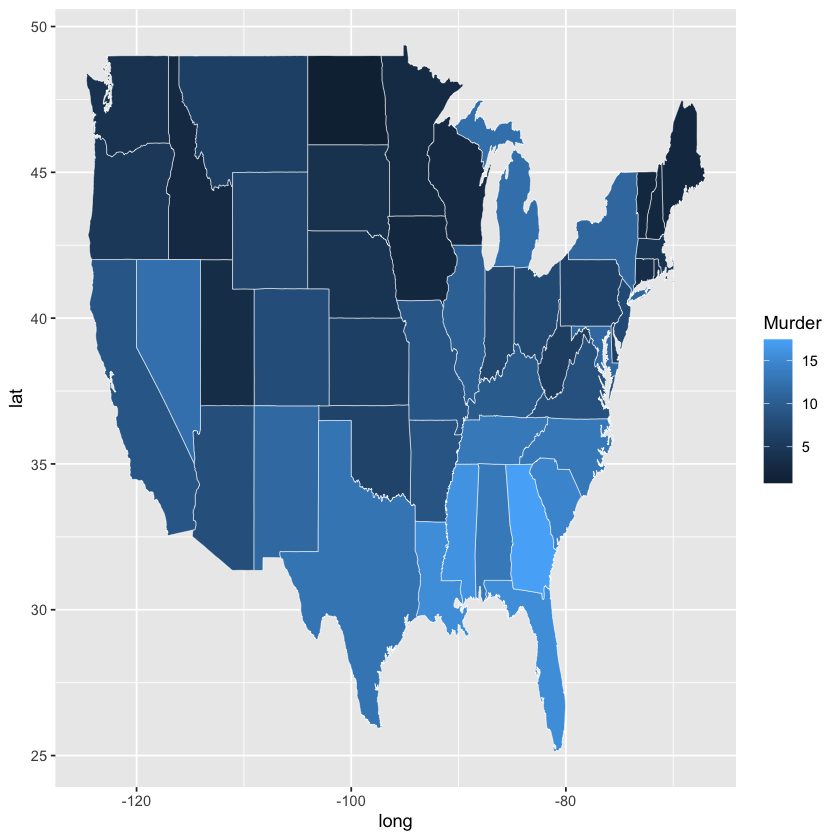

In [31]:
g = ggplot()
g = g + geom_map(data=us, map=us,
                    aes(x=long, y=lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.15)
g = g + geom_map(data=arrest, map=us,
                    aes(fill=Murder, map_id=region),
                    color="#ffffff", size=0.15)
g

# 5 ggplot



In [37]:
library(lubridate) # date operations
library(gridExtra)

## 5.1 [Scatter plots](https://ggplot2.tidyverse.org/reference/geom_point.html)


### 5.1.1 Import internal practice data set

In [39]:
head(mtcars, 5)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2

### 5.2.1  Basic scatter 
- ggplot(DATAFRAME, aes(x=column_name_1, y= column_name_2) + geom_point()

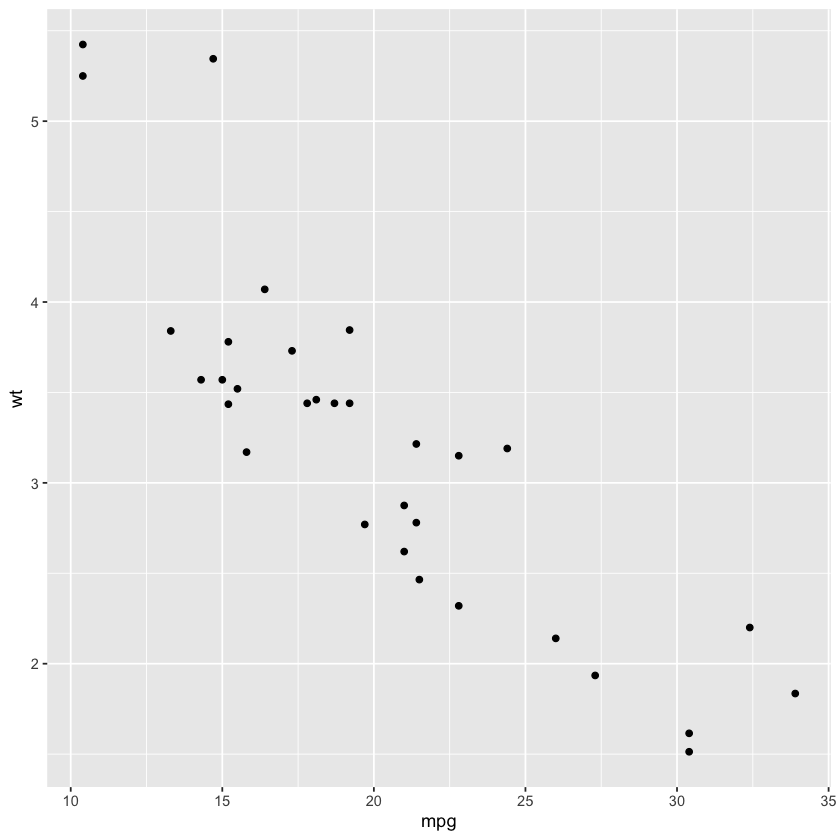

In [40]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point()


### 5.2.2 Scatter plot with title 



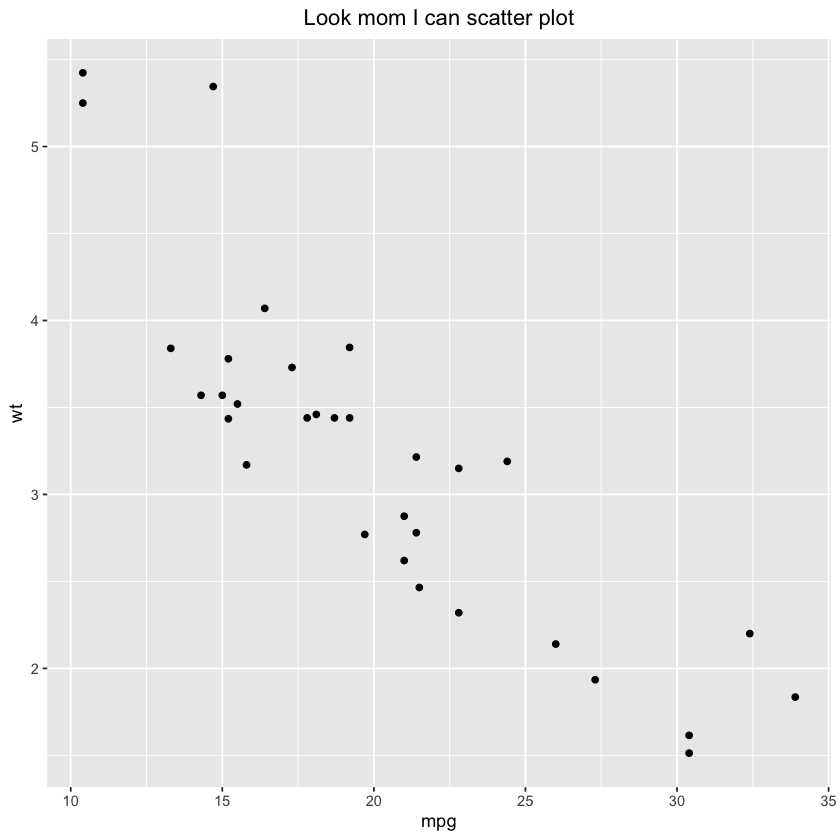

In [42]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point()+
ggtitle('Look mom I can scatter plot')+ theme(plot.title = element_text(hjust = 0.5)) #title

### 5.2.3 Scatter plot with dots transparent and red


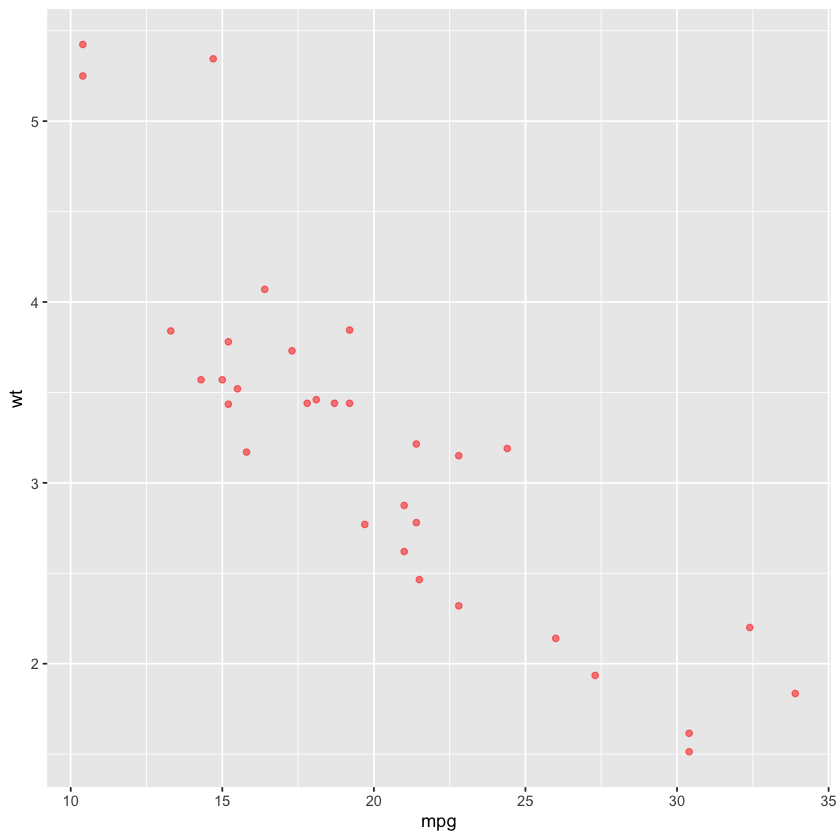

In [43]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point(alpha=.5, color='red')


## 5.2.[Bar charts](https://ggplot2.tidyverse.org/reference/geom_bar.html)

### 5.2.1 Import data set

In [45]:
url = 'https://raw.githubusercontent.com/corybaird/PLCY_610_public/master/Reference_materials/Tutorials_R_Stata_Python/R/W3_ggplot/global_covid.csv'
df = read.csv(url)
head(df,3)

X name          confirm suspect dead  deadRate showRate heal  healRate
1 1 China          83039  88       3340  4.02    FALSE    77361 93.16   
2 2 United States 143071   0       2513  1.76    FALSE     4856  3.39   
3 3 Italy          97689   0      10779 11.03    FALSE    13030 13.34   
  showHeal
1  TRUE   
2 FALSE   
3 FALSE

### 5.2.2 Basic bar chart


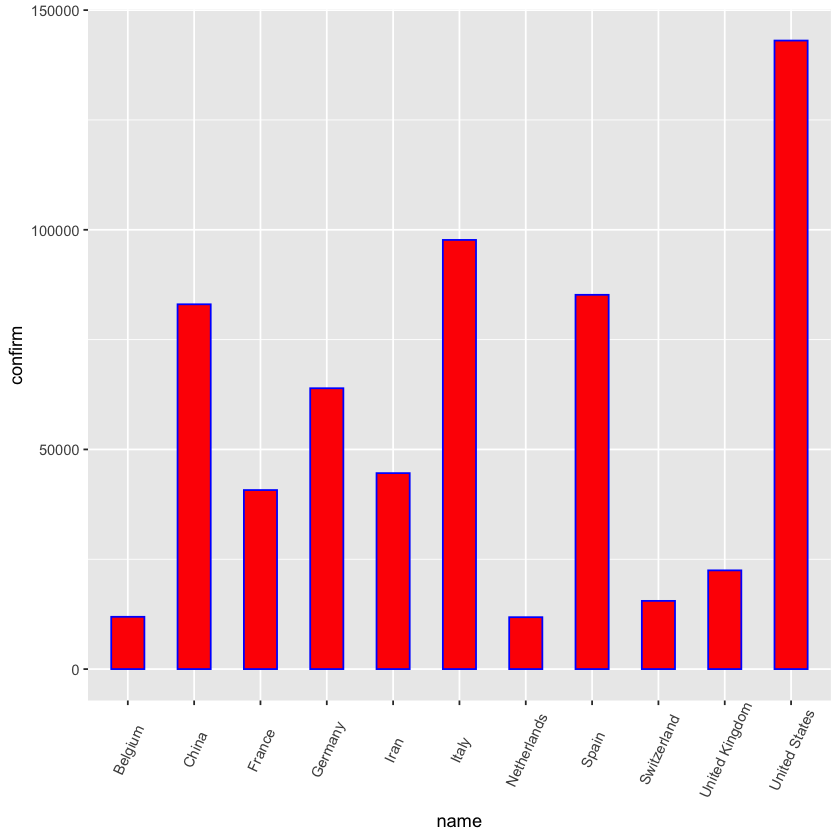

In [47]:
ggplot(df%>%filter(confirm>10000), aes(x=name, y=confirm)) + 
geom_bar(stat="identity", width=.5, fill='red',color='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

### 5.2.3 Ordered bar chart


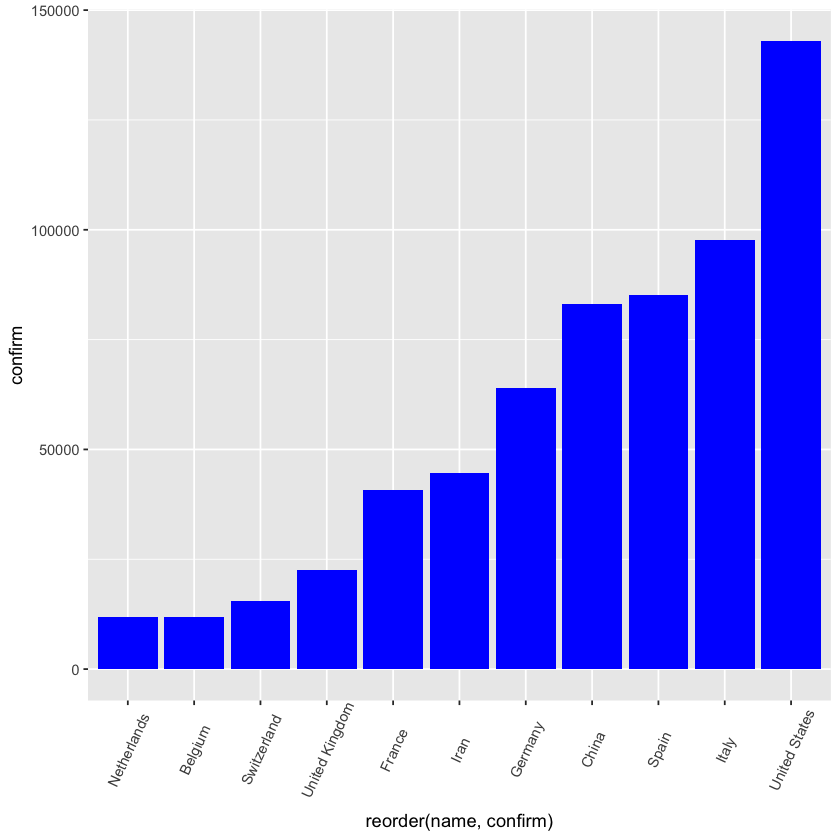

In [48]:
ggplot(df%>%arrange(desc(confirm))%>%filter(confirm>10000), aes(x=reorder(name, confirm), y=confirm)) + 
geom_bar(stat="identity", fill='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

## 5.3. [Line charts](https://www.r-graph-gallery.com/279-plotting-time-series-with-ggplot2.html)

In [50]:
url = 'https://raw.githubusercontent.com/corybaird/PLCY_610_public/master/Reference_materials/Tutorials_R_Stata_Python/R/W3_ggplot/Covid_TS_global.csv'
df = read.csv(url)
df$date = as.Date(df$date)
head(df, 2)


X country     date       confirmed deaths recovered
1 1 Afghanistan 2020-01-22 0         0      0        
2 2 Afghanistan 2020-01-23 0         0      0

### 5.3.1 One line


In [51]:
japan = df %>% filter(country=='Japan')
head(japan,2)

X    country date       confirmed deaths recovered
1 6709 Japan   2020-01-22 2         0      0        
2 6710 Japan   2020-01-23 2         0      0

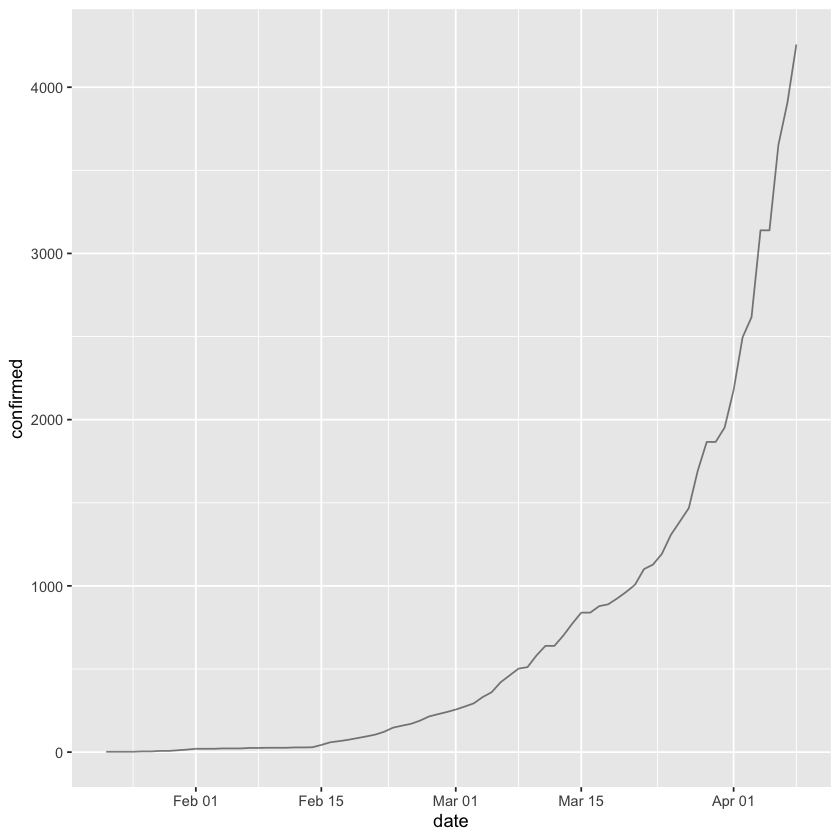

In [52]:
japan %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(alpha=0.5)

### 5.3.2 Multiple lines


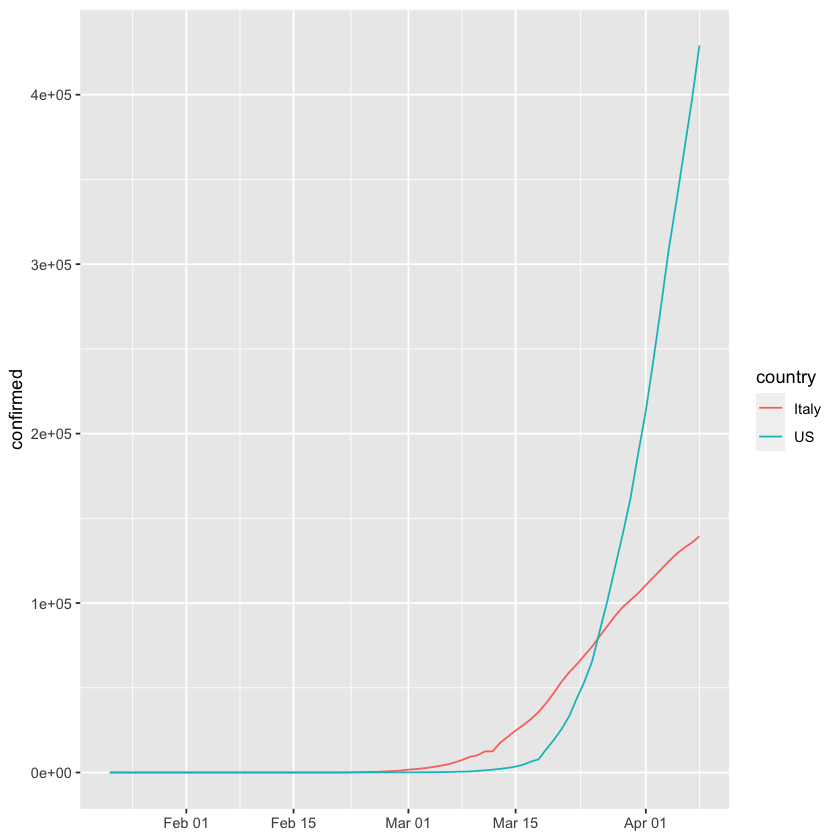

In [54]:
df %>% filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())

## 5.4 Multiple graphs


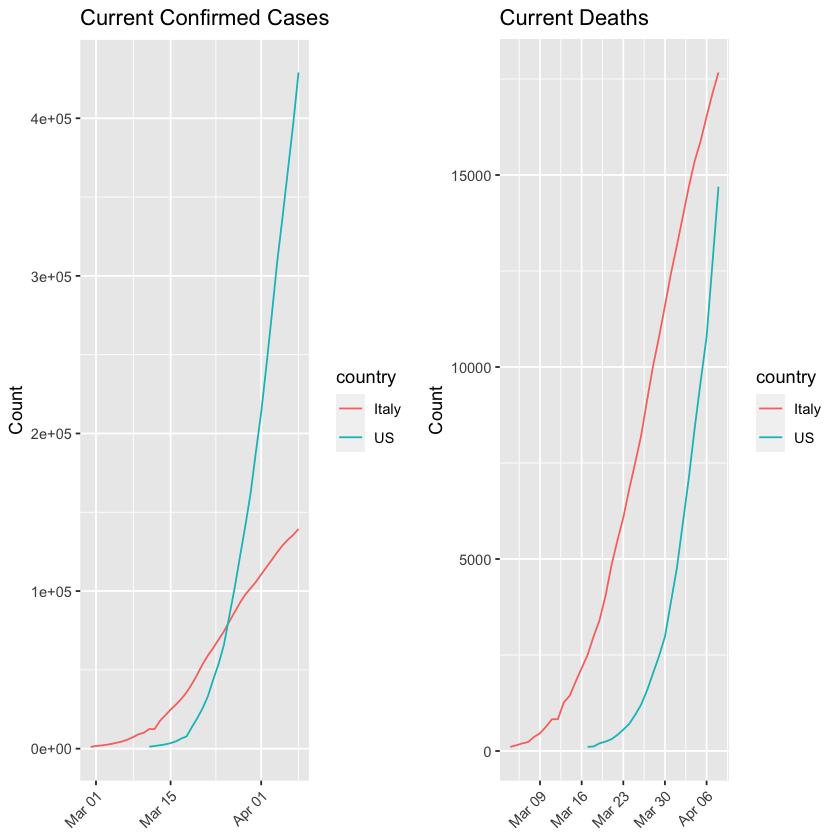

In [55]:
plot1 = df %>% filter(confirmed>1000)  %>%  filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Confirmed Cases') + theme(axis.text.x=element_text(angle=45, hjust=1))

plot2 = df %>% filter(deaths>100) %>%filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=deaths)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Deaths') + theme(axis.text.x=element_text(angle=45, hjust=1))

grid.arrange(plot1, plot2, ncol=2)